In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

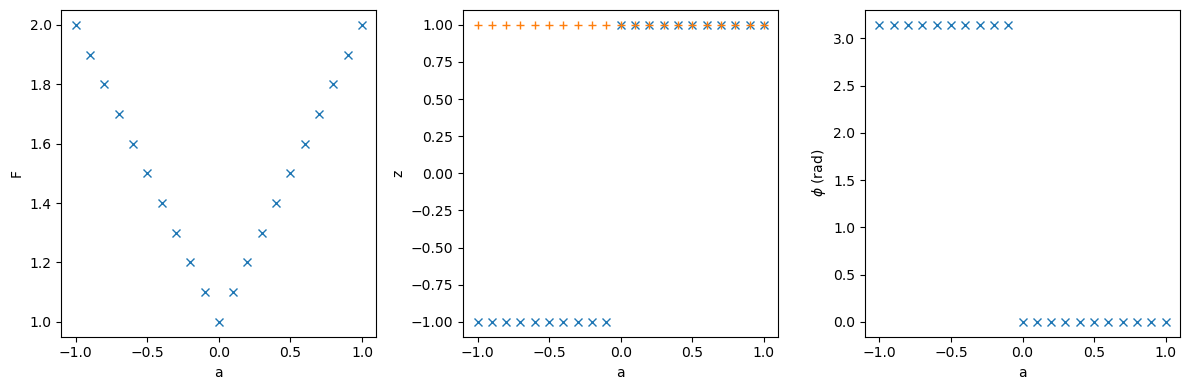

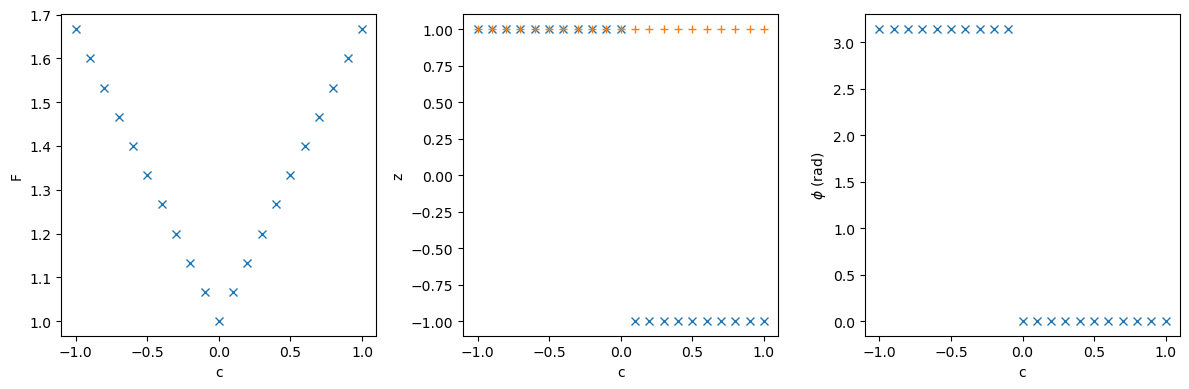

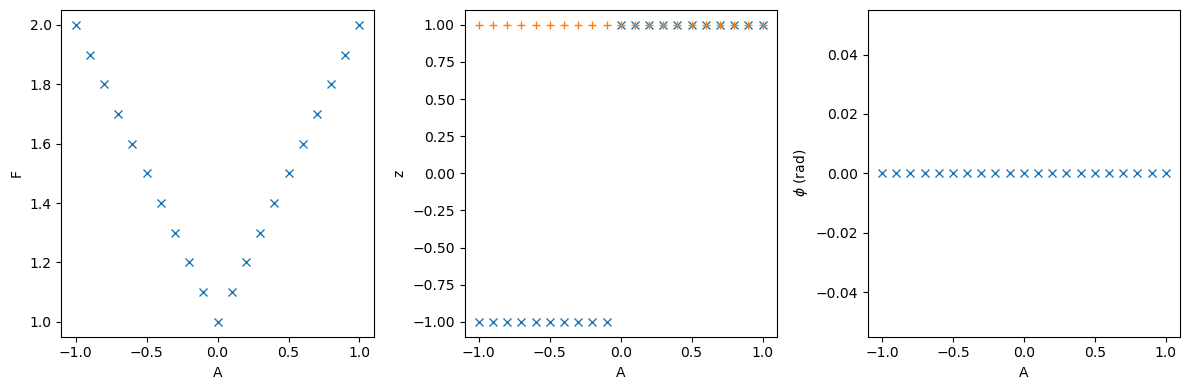

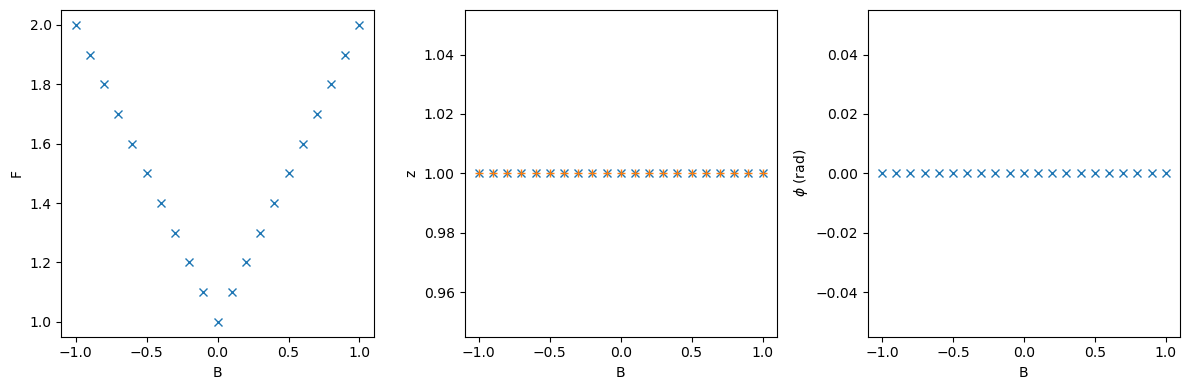

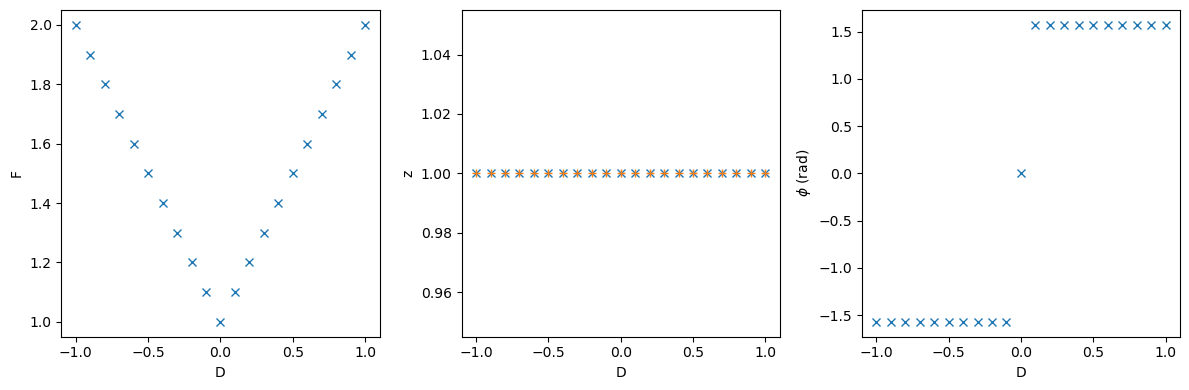

In [11]:
varNames = ["a","c","A","B","D"]

for name in varNames:
    data = np.loadtxt(f"build/{name}_maxF_test.txt")
    fig, axs = plt.subplots(1,3,figsize = (12,4))
    for ax in axs:
        ax.set_xlabel(name)
    axs[0].set_ylabel("F")
    axs[1].set_ylabel("z")
    axs[2].set_ylabel("$\\phi$ (rad)")
    axs[0].plot(data[:,0],data[:,1],"x")
    axs[1].plot(data[:,0],data[:,2],"x")
    axs[1].plot(data[:,0],data[:,3],"+")
    axs[2].plot(data[:,0],data[:,4],"x")
    fig.tight_layout()
    plt.show()

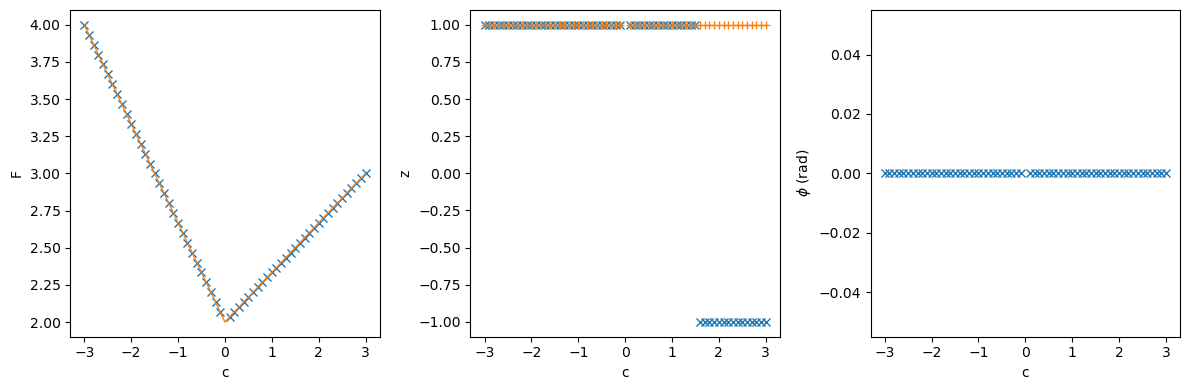

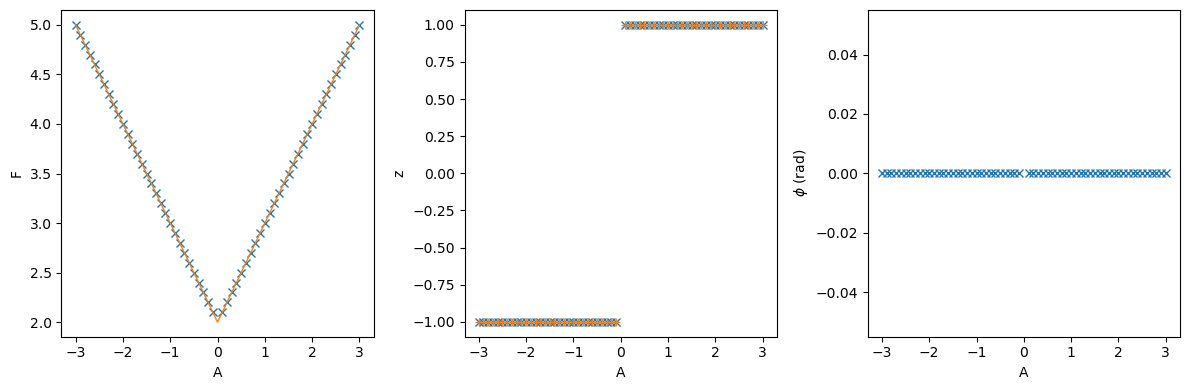

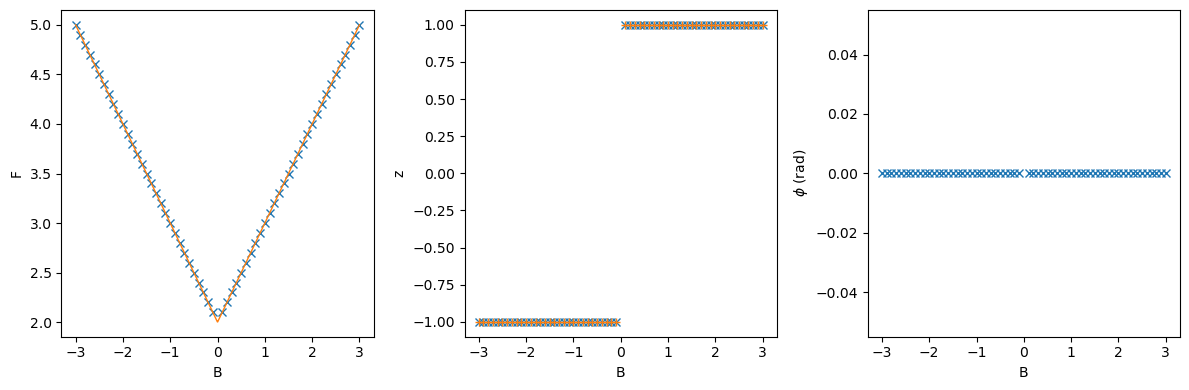

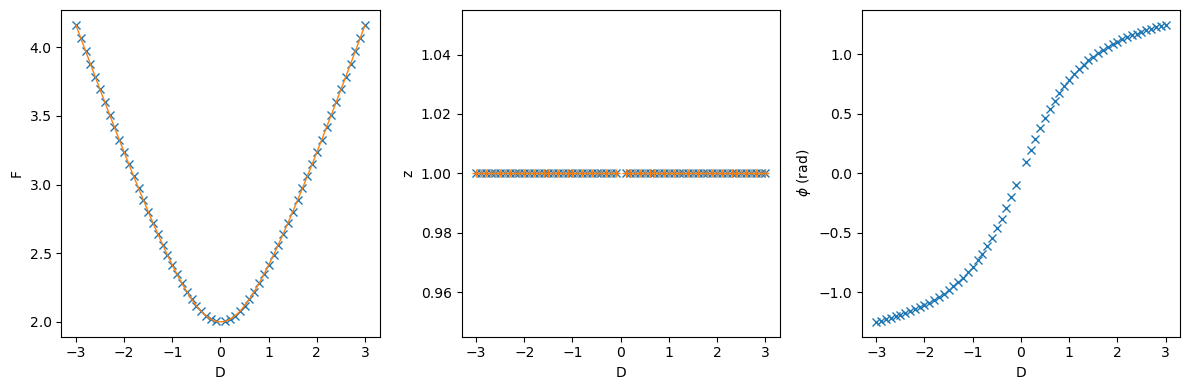

In [34]:
varNames = ["c","A","B","D"]

x = np.linspace(-3,3,1000)

def F(name,x):
    F = np.zeros_like(x)
    if name == "c":
        F[x>=0] = 2 + x[x>=0]/3
        F[x<0] = 2 - 2*x[x<0]/3
    elif name == "D":
        F = 1 + np.sqrt(x**2+1)
    else:
        F = 2 + np.abs(x)
    return F

for name in varNames:
    data = np.loadtxt(f"build/a{name}_maxF_test.txt")
    fig, axs = plt.subplots(1,3,figsize = (12,4))
    for ax in axs:
        ax.set_xlabel(name)
    axs[0].set_ylabel("F")
    axs[1].set_ylabel("z")
    axs[2].set_ylabel("$\\phi$ (rad)")
    axs[0].plot(data[:,0],data[:,1],"x")
    axs[0].plot(x,F(name,x),linewidth = 1)
    axs[1].plot(data[:,0],data[:,2],"x")
    axs[1].plot(data[:,0],data[:,3],"+")
    axs[2].plot(data[:,0],data[:,4],"x")
    fig.tight_layout()
    plt.show()

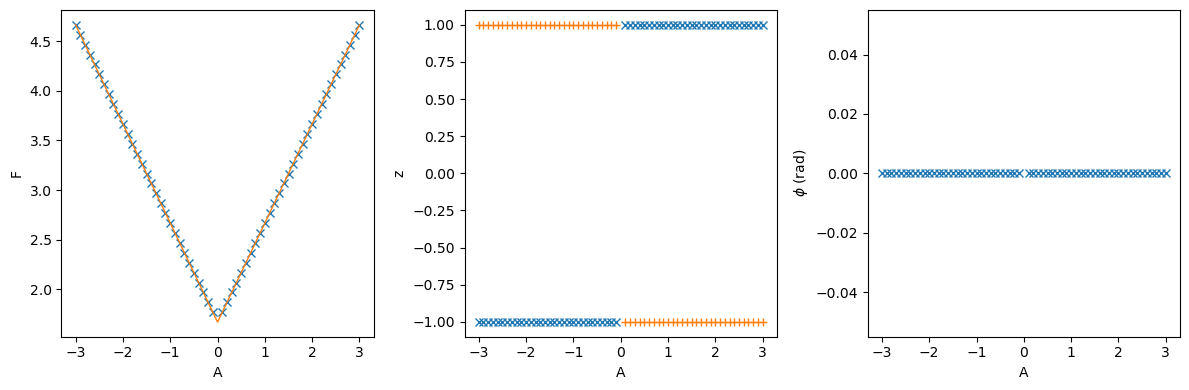

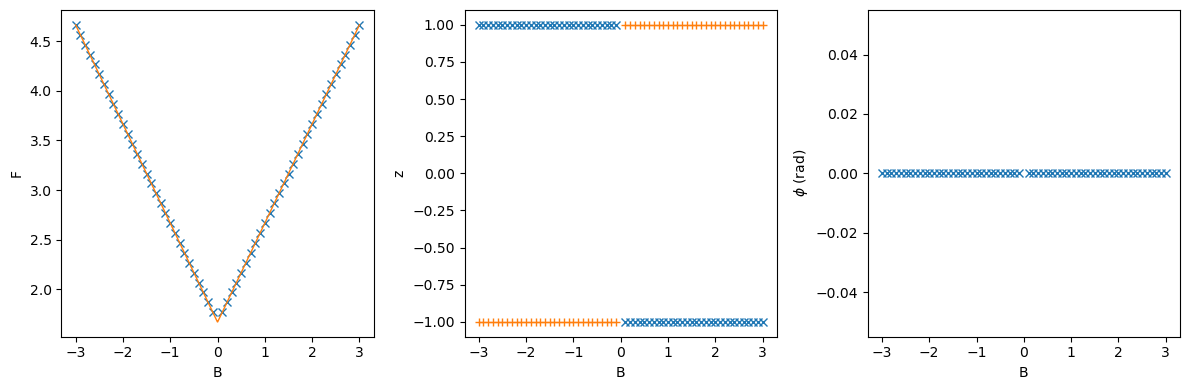

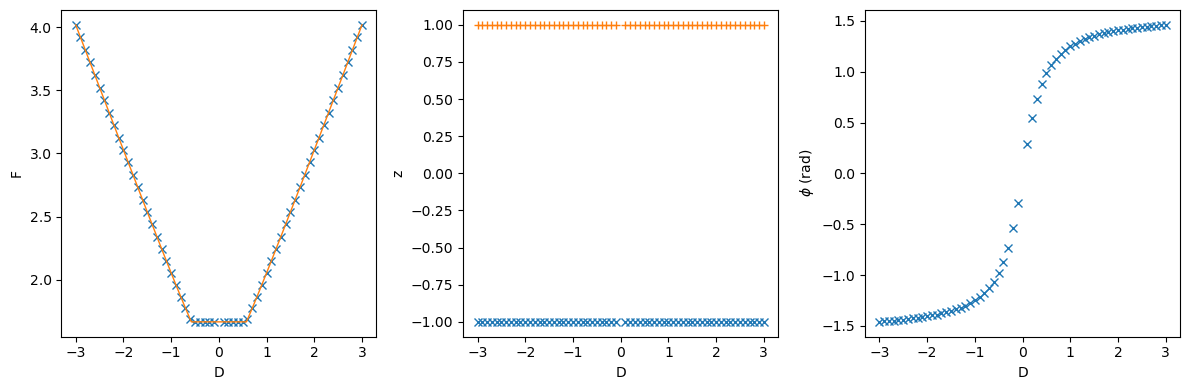

In [39]:
varNames = ["A","B","D"]

def F(name,x):
    F = np.zeros_like(x)
    if name == "D":
        F[np.abs(x)>np.sqrt(1/3)] = 1 + np.sqrt(x[np.abs(x)>np.sqrt(1/3)]**2+1/9)
        F[np.abs(x)<np.sqrt(1/3)] = 5/3
    else:
        F = 5/3 + np.abs(x)
    return F

for name in varNames:
    data = np.loadtxt(f"build/c{name}_maxF_test.txt")
    fig, axs = plt.subplots(1,3,figsize = (12,4))
    for ax in axs:
        ax.set_xlabel(name)
    axs[0].set_ylabel("F")
    axs[1].set_ylabel("z")
    axs[2].set_ylabel("$\\phi$ (rad)")
    axs[0].plot(data[:,0],data[:,1],"x")
    axs[0].plot(x,F(name,x),linewidth = 1)
    axs[1].plot(data[:,0],data[:,2],"x")
    axs[1].plot(data[:,0],data[:,3],"+")
    axs[2].plot(data[:,0],data[:,4],"x")
    fig.tight_layout()
    plt.show()

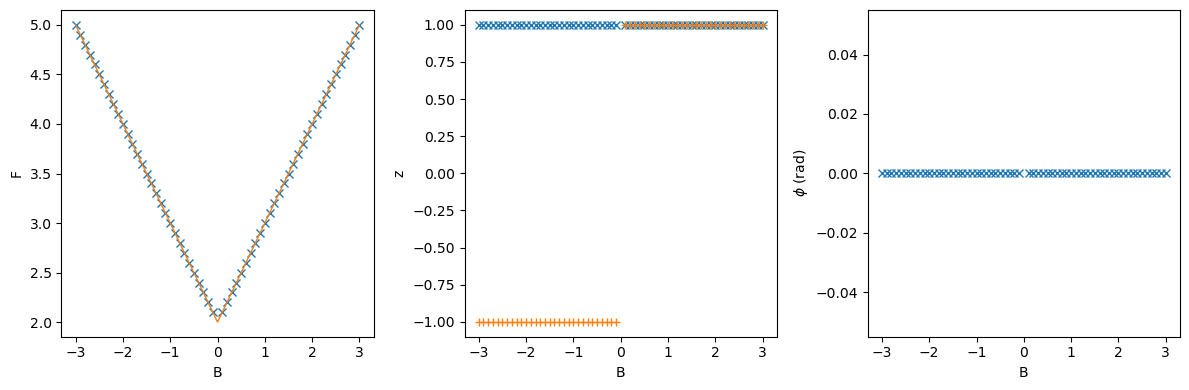

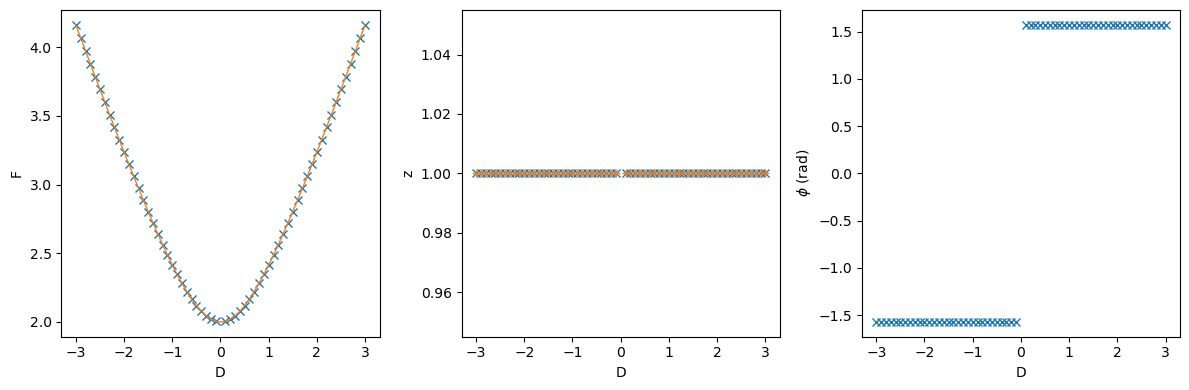

In [40]:
varNames = ["B","D"]

def F(name,x):
    F = np.zeros_like(x)
    if name == "D":
        F = 1+np.sqrt(x**2+1)
    else:
        F = 2 + np.abs(x)
    return F

for name in varNames:
    data = np.loadtxt(f"build/A{name}_maxF_test.txt")
    fig, axs = plt.subplots(1,3,figsize = (12,4))
    for ax in axs:
        ax.set_xlabel(name)
    axs[0].set_ylabel("F")
    axs[1].set_ylabel("z")
    axs[2].set_ylabel("$\\phi$ (rad)")
    axs[0].plot(data[:,0],data[:,1],"x")    
    axs[0].plot(x,F(name,x),linewidth = 1)
    axs[1].plot(data[:,0],data[:,2],"x")
    axs[1].plot(data[:,0],data[:,3],"+")
    axs[2].plot(data[:,0],data[:,4],"x")
    fig.tight_layout()
    plt.show()

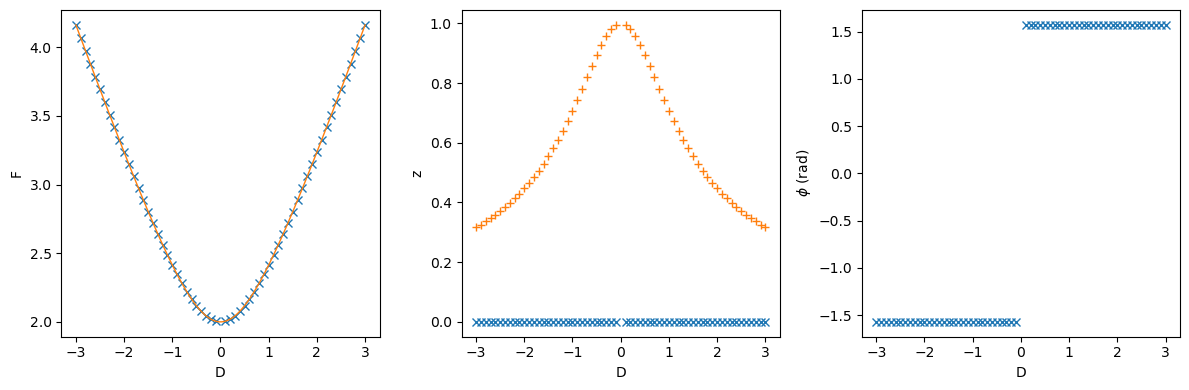

In [41]:
data = np.loadtxt(f"build/BD_maxF_test.txt")

def F(name,x):
    F = np.zeros_like(x)
    if name == "D":
        F = 1+np.sqrt(x**2+1)
    else:
        F = 2 + np.abs(x)
    return F

fig, axs = plt.subplots(1,3,figsize = (12,4))
for ax in axs:
    ax.set_xlabel(name)
axs[0].set_ylabel("F")
axs[1].set_ylabel("z")
axs[2].set_ylabel("$\\phi$ (rad)")
axs[0].plot(data[:,0],data[:,1],"x")
axs[0].plot(x,F(name,x),linewidth = 1)
axs[1].plot(data[:,0],data[:,2],"x")
axs[1].plot(data[:,0],data[:,3],"+")
axs[2].plot(data[:,0],data[:,4],"x")
fig.tight_layout()
plt.show()